# Part 1

## 1.1 Linear Regression

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [196]:
import scienceplots
plt.style.use(['default'])
plt.style.use(['science', 'no-latex'])

In [197]:
def generate_sin_data(sigma, N):
    """
    Function to generate X data from a uniform distribution and corresponding y data with normal errors.

    Parameters
    ----------
    sigma : float 
        standard deviation of normal errors
    N : int
        number of data points

    Returns
    -------
    X : ndarray
        input data
    y : ndarray
        corresponding output data with normal error term

    """
    X = np.random.uniform(0,1,N) 
    y = np.sin(2*np.pi*X)**2 + np.random.normal(0,sigma,N)
    return X, y

In [198]:
def poly_feature_space(X, k):
    """
    Function to create the polynomial feature space.
    The function loops through all x applying polynomial basis of order to each data point.
    The matrix rows correpsond to the ith data point.
    The matrix columns correspond to the jth polynomial basis function.

    Parameters
    ----------
    X : ndarray
        input data
    k : int
        polynomial basis order

    Returns
    -------
    phi : ndarray
        polynomial feature space of order k

    """
    # initiliase empty feature space matrix of dimension {len(X),k}
    phi = np.zeros([len(X), k])
    # iteratively fill feature space matrix
    for i in range(len(X)):
        for j in range(k):
            phi[i,j]+=X[i]**j
    return phi

In [199]:
def optimal_weights(phi, y):
    """
    Function to obtain the optimal weights.
    The function performs the matrix operation (phi^T*phi)^-1*phi^T*y and returns the result.

    Parameters
    ----------
    phi : ndarray
        feature space
    y : ndarray
        output data of dimensions {1, n}

    Returns
    -------
    Array of optimal weights: ndarray

    """
    # linearly independent rows so need right inverse
    # utilise numpys built-in pseduo-inverse function to complete matrix operation 
    return phi.T@np.linalg.pinv(phi@phi.T)@y

In [200]:
def eval_poly(w, X):
    """
    Function to produce fitted y data applying the optimal weights to the corresponding basis function.

    Parameters
    ----------
    w : ndarray
        optimal weights
    X : ndarray
        input data

    Returns
    -------
    Array of fitted y values: ndarray

    """
    # list comprehension creating an array of predicted values using optimised weights to scale polynomial elements 
    return np.array([np.sum(np.array([w[i]*(x**i) for i in range(len(w))])) for x in X])

In [201]:
def sin_feature_space(X, k):
    """
    Function to create the sine feature space.
    The function loops through all x applying sine basis of order k to each data point.
    The matrix rows correspond to the ith data point.
    The matrix columns correspond to the jth order sine basis function.

    Parameters
    ----------
    X : ndarray
        input data
    k : int
        sine basis order

    Returns
    -------
    phi : ndarray
        sine feature space of dimensions {len(X), k}

    """
    # initiliase empty feature space matrix
    phi = np.zeros([len(X), k])
    # iteratively fill feature space matrix of dimensions
    for i in range(len(X)):
        for j in range(k):
            phi[i,j]+=np.sin((j+1)*np.pi*X[i])
    return phi

In [202]:
def eval_sin(w, X):
    """
    Function to produce fitted y data applying the optimal weights to the corresponding basis function.

    Parameters
    ----------
    w : optimal weights
    X : X data

    Returns
    -------
    Vector of fitted y values

    """
    # create an array of predicted values using optimised weights to scale sine elements 
    return np.array([np.sum(np.array([w[i]*(np.sin((i+1)*np.pi*x)) for i in range(len(w))])) for x in X])

In [203]:
def linear_regression(X, y, k, feature_space):
    """
    Function to build a feature space and find the optimal weights of each basis.

    Parameters
    ----------
    X : ndarray
        X data
    y : ndarray
        y data
    k : int
        order of feature space basis function
    feature_space : Callable
        function to create feature space

    Returns
    -------
    phi : ndarray
        populated feature space
    w : ndarray
        populated weights vector

    """
    # use functions defined above to generate feature space and weights array
    phi = feature_space(X, k)
    w = optimal_weights(phi, y)
    return phi, w

### 1a.

In [204]:
# create arrays of sample data provided
X = np.array([1, 2, 3, 4])
y = np.array([3, 2, 0, 5])

In [205]:
# create 'continuous data' for plotting full curve
x_axis = np.linspace(0,5,1000)

In [206]:
# intitialise empty feature space store and weights store
f_space_list1 = []
weights_list1 = []

In [207]:
# intitialise empty mse dictionary; key correspsonding to each basis function
mse_dict = {'Basis 1' :None, 'Basis 2': None, 'Basis 3': None, 'Basis 4': None}

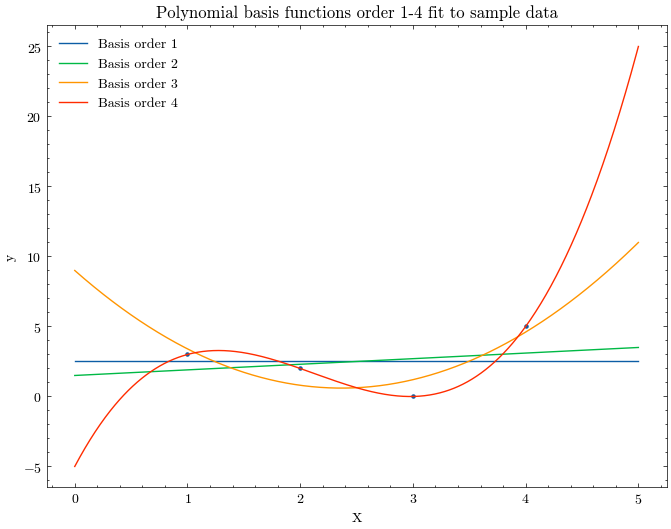

In [208]:
plt.figure(figsize=(8,6))

# loop through range 1-4 to generate feature space and optimal weights for each basis vector of order 1-4
# {1}, {1, x}, {1, x, x^2}, {1, x, x^2, x^3}
for k in range(4):
    
    # build feature space and find weights; append to list to store
    phi, w = linear_regression(X, y, k+1, poly_feature_space)
    f_space_list1.append(phi)
    weights_list1.append(w)
    
    # calculate fitted y values from the sample X data
    pred_sample = eval_poly(w, X)
    
    # calculate mse and add to corresponding dictionary key
    mse_dict["Basis "+str(k+1)] = np.average((y-pred_sample)**2)
    
    # calculate predicted y values for 'all' x using optimised weights
    pred = eval_poly(w, x_axis)
    plt.plot(x_axis, pred, label="Basis order "+str(k+1))
    
# show plot of four curves overlaying sample data 
plt.scatter(X, y, s=5)
plt.legend()
plt.title("Polynomial basis functions order 1-4 fit to sample data")
plt.xlabel("X")
plt.ylabel("y")
plt.savefig("q1a_plot.png")
plt.show()

### 1b. Equations of fitted basis functions

In [327]:
print(weights_list1)

[array([2.5]), array([1.5, 0.4]), array([ 9. , -7.1,  1.5]), array([-5.        , 15.16666667, -8.5       ,  1.33333333])]


$\{1\}: y=2.5 \\
\{1, x\}: y=1.5+0.4x \\
\{1, x, x^2\}: y=9-7.1x+1.5x^2 \\
\{1, x, x^2, x^3\}: y=-5+15.17x-8.5x^2+1.33x^3$

### 1c.

In [326]:
# convert mse dictionary to dataframe and show
mse_df = pd.DataFrame.from_dict(mse_dict, orient='index', columns=['MSE'])
mse_df

,MSE
Basis 1,3.250000e+00
Basis 2,3.050000e+00
Basis 3,8.000000e-01
Basis 4,2.317739e-21


### 2ai.

In [252]:
# generate 30 random data points using given sigma
sigma = 0.07
X_sample, y_sample = generate_sin_data(sigma, 30)

In [253]:
# create 'continuous data' for plotting full curve
x_axis = np.linspace(0,1,1000)
y_true = np.sin(2*np.pi*x_axis)**2 

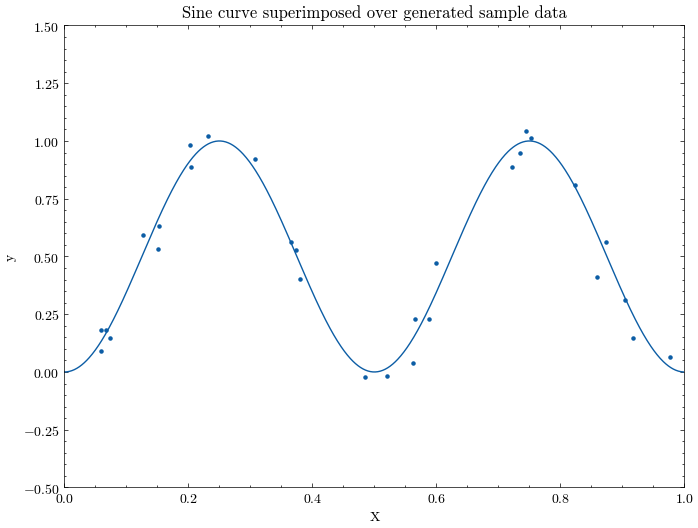

In [254]:
# plot full curve with sample overlay
plt.figure(figsize=(8,6))
plt.scatter(X_sample, y_sample, s=5)
plt.title("Sine curve superimposed over generated sample data")
plt.xlabel("X")
plt.ylabel("y")
plt.plot(x_axis, y_true)
plt.ylim(-0.5,1.5)
plt.xlim(0,1)
plt.savefig("q2ai_sine-data.png")
plt.show()

### 2aii.

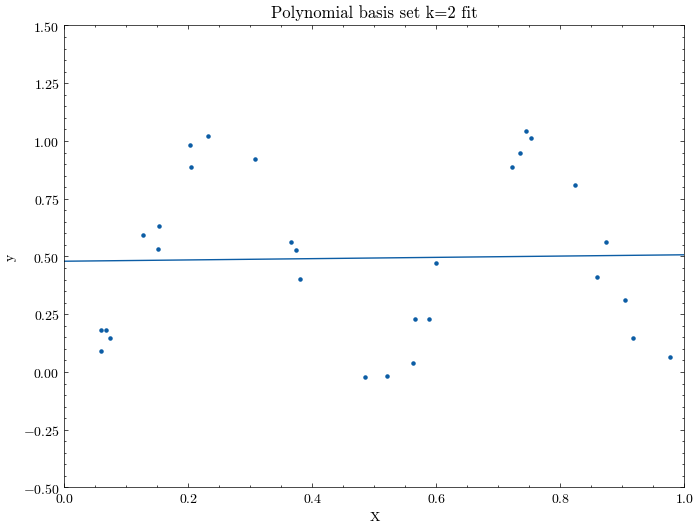

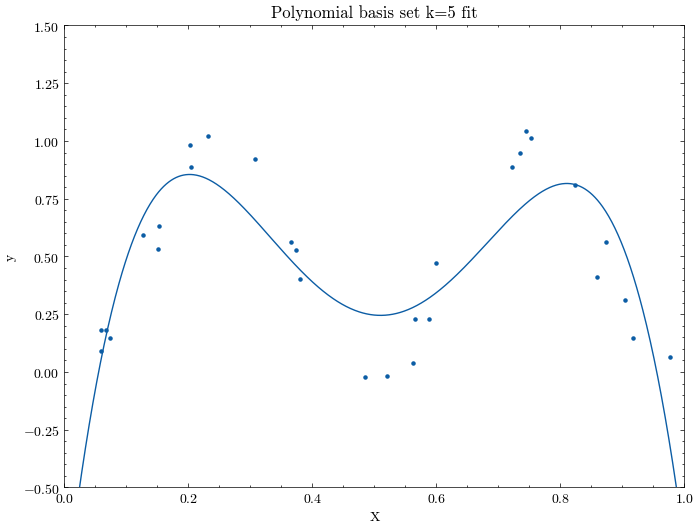

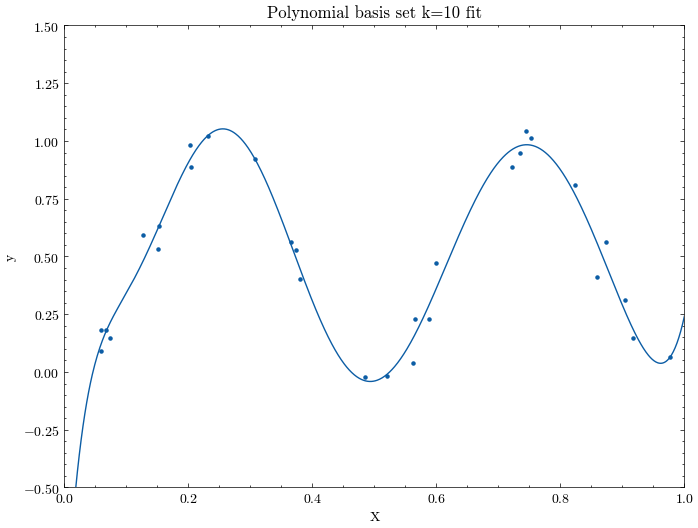

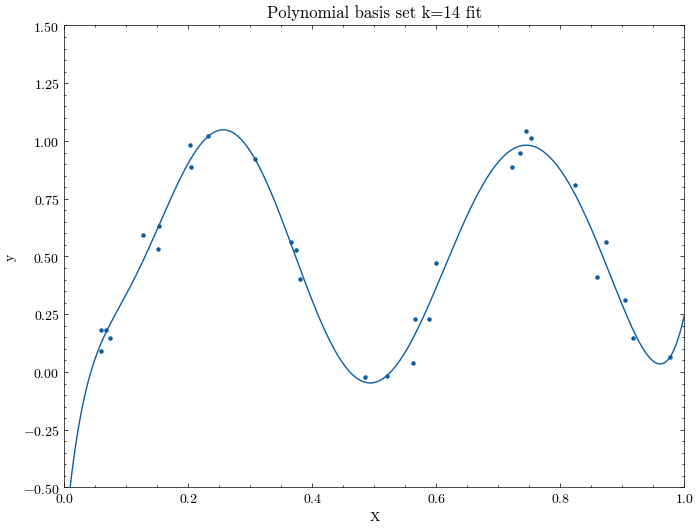

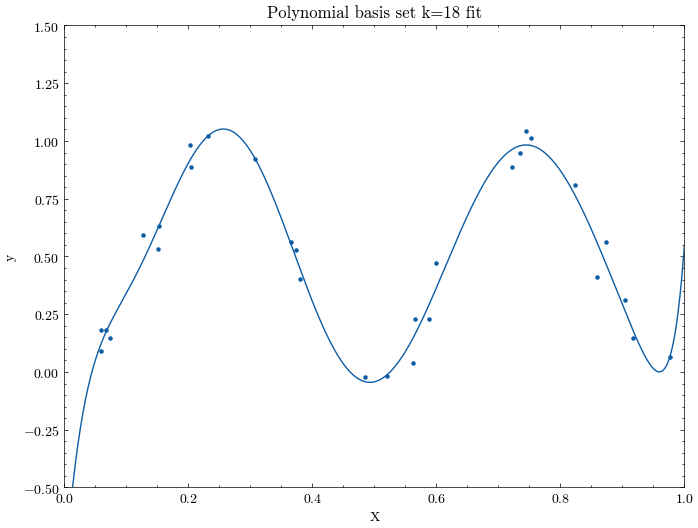

In [255]:
# initialise empty lists to store feature spaces and weight vectors for 2a
f_space_list2 = []
weight_list2 = []

# perform linear regression for basis functions of order 2, 5, 10, 14, and 18
orders = [2, 5, 10, 14, 18]
for k in range(len(orders)):
    
    # build feature space of dimensions {len(X_sample), orders[k]} and find weights array {k, 1}
    phi, w = linear_regression(X_sample, y_sample, orders[k], poly_feature_space)
    f_space_list2.append(phi)
    weight_list2.append(w)
    
    # use weights to make predictions
    pred = eval_poly(w, x_axis)
    
    # plot sample data points with fitted polynomial basis overlay
    plt.figure(figsize=(8,6))
    plt.title(f"Polynomial basis set k={orders[k]} fit")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.plot(x_axis, pred)
    plt.scatter(X_sample, y_sample, s=5)
    plt.ylim(-0.5,1.5)
    plt.xlim(0,1)
    plt.savefig(f"q2aii_basis-{orders[k]}.png")
    plt.show()

### 2b.

In [256]:
# initialise empty lists to store feature spaces and weight vectors for 2b
f_space_list3 = []
weights_list3 = []

In [257]:
# initialise empty mse list for sample data 
mse_sample = []

# repeat process in 2a. for all polynomial feature spaces of order 1-18
orders18 = np.arange(0,18)
for k in orders18:

    # build feature space of dimensions {len(X_sample), k+1} and find weights array {k+1, 1}
    phi, w = linear_regression(X_sample, y_sample, k+1, poly_feature_space)
    f_space_list3.append(phi)
    weights_list3.append(w)
    
    # use weights to make predictions and determine mse
    pred_sample = eval_poly(w, X_sample)
    mse_sample.append(np.average((y_sample-pred_sample)**2))

In [258]:
# calculate log mse for each basis
log_mse_sample = np.log(mse_sample)

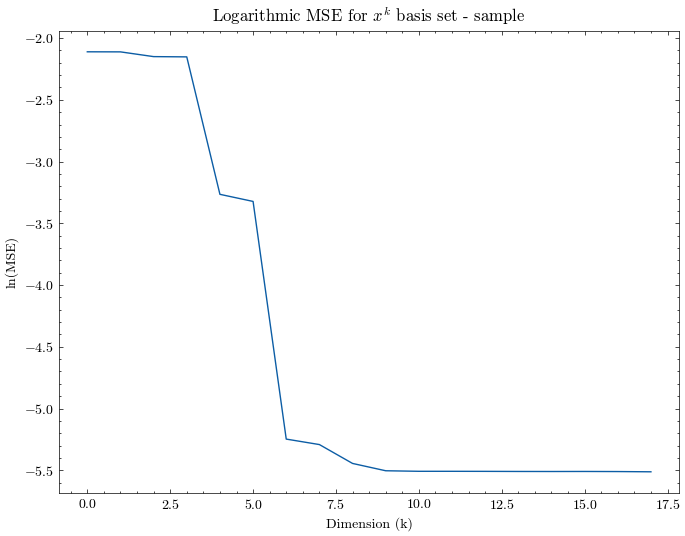

In [259]:
# plot the log mse against dimension of basis function used
plt.figure(figsize=(8,6))
plt.title("Logarithmic MSE for "r"$x^k$"" basis set - sample")
plt.xlabel("Dimension (k)")
plt.ylabel("ln(MSE)")
plt.plot(orders18, log_mse_sample)
plt.savefig("q2b_poly-lnmse-sample.png")
plt.show()

### 2c.

In [260]:
# generate 1000 unseen test data points
X_test, y_test = generate_sin_data(sigma, 1000)

In [261]:
# initialise empty mse list for test data
mse_test = []

# perform linear regression on generated X test data using weights calculated in 2b. 
# repeat for all polynomial fits up to order 18 and calculate the mse using generated y test data
for w in range(len(weights_list3)): 
    pred_test = eval_poly(weights_list3[w], X_test)
    mse_test.append(np.average((y_test-pred_test)**2))

In [262]:
# calculate log mse for test data
log_mse_test = np.log(mse_test)

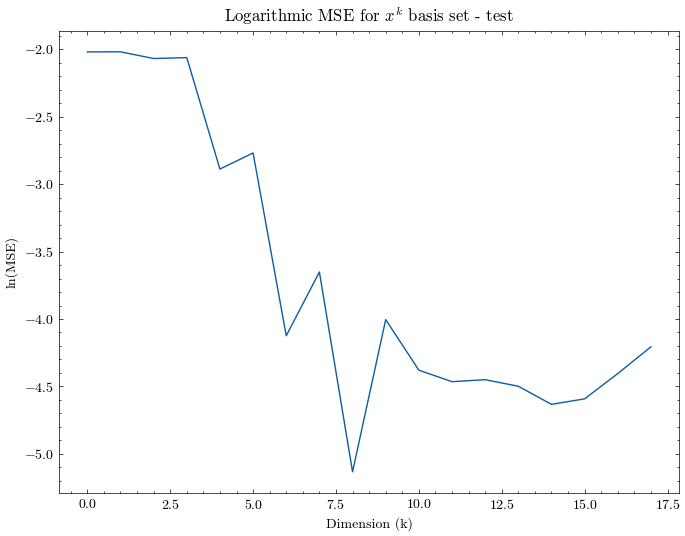

In [263]:
# plot log mse from the test data against dimension of basis function used 
plt.figure(figsize=(8,6))
plt.title("Logarithmic MSE for "r"$x^k$"" basis set - test")
plt.xlabel("Dimension (k)")
plt.ylabel("ln(MSE)")
plt.plot(orders18, log_mse_test)
plt.savefig("q2c_poly-lnmse-test.png")
plt.show()

### 2d.

In [264]:
# initialise empty matrix of dimensions {100, 18} to store mse values of 18 basis functions over 100 runs 
mse_train_all = np.zeros([100, 18])
mse_test_all = np.zeros([100, 18])

# perform 100 runs of linear regression using polynomial feature spaces with basis functions order 1-18
runs = 100
for r in tqdm(range(runs)):
    
    # generate new train/test splits each run
    X_train, y_train = generate_sin_data(sigma, 30)
    X_test, y_test = generate_sin_data(sigma, 1000)
    
    for k in range(0,18): 
        
        # build feature space of dimensions {len(X_train), k+1} and find weights array {k+1, 1}
        phi, w = linear_regression(X_train, y_train, k+1, poly_feature_space)
        
        # make predictions and record mse for train and test
        pred_train = eval_poly(w, X_train)
        mse_train = np.average((y_train-pred_train)**2)
        mse_train_all[r,k] = mse_train

        pred_test = eval_poly(w, X_test)
        mse_test = np.average((y_test-pred_test)**2)
        mse_test_all[r,k] = mse_test

  0%|          | 0/100 [00:00<?, ?it/s]

In [265]:
# calculate the log average mse over 100 runs 
logavg_mse_train = np.log(np.average(mse_train_all, axis=0))
logavg_mse_test = np.log(np.average(mse_test_all, axis=0))

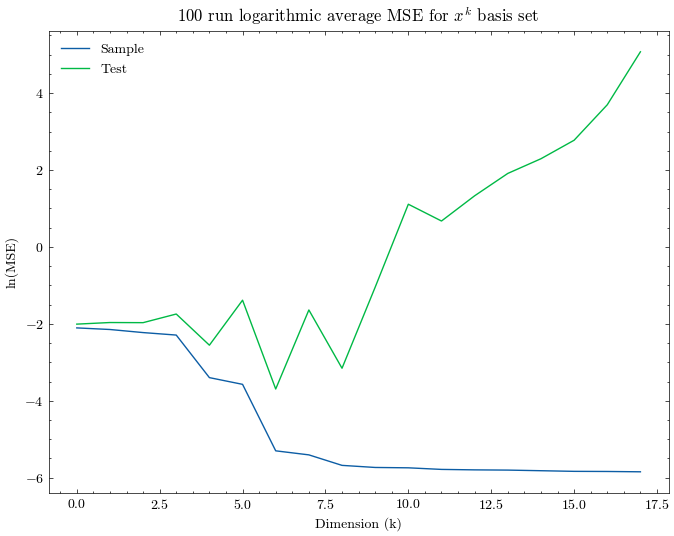

In [266]:
# plot the log average mse for train and test against dimension of basis function used
plt.figure(figsize=(8,6))
plt.title("100 run logarithmic average MSE for "r"$x^k$"" basis set")
plt.xlabel("Dimension (k)")
plt.ylabel("ln(MSE)")
plt.plot(np.arange(0,18), logavg_mse_train, label='Sample') 
plt.plot(np.arange(0,18), logavg_mse_test, label='Test') 
plt.legend()
plt.savefig("q2d_poly-lnmse-100.png")
plt.show()

### 3.

In [267]:
# intialise empty feature space and weight lists for sine basis
sin_f_space_list = []
sin_weights_list = []

# intialise list to store sine mse results
sin_mse_sample = []

# fit linear regression using sine basis functions up to order 18
orders18 = np.arange(0,18)
for k in orders18:
    
    # build feature space of dimensions {len(X_sample), k+1} and find weights array {k+1, 1}
    phi, w = linear_regression(X_sample, y_sample, k+1, sin_feature_space)
    sin_f_space_list.append(phi)
    sin_weights_list.append(w)
    
    # make predictions using optimal weights and record mse
    pred_sample = eval_sin(w, X_sample)
    sin_mse_sample.append(np.average((y_sample-pred_sample)**2))

In [268]:
# calculate log of mse results    
logsin_mse_sample = np.log(sin_mse_sample)

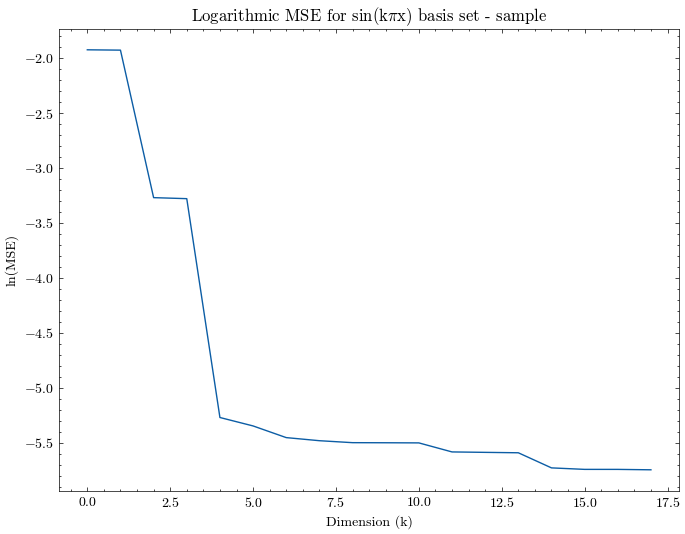

In [269]:
# plot log average mse for sample against dimension of basis function used
plt.figure(figsize=(8,6))
plt.title("Logarithmic MSE for sin(k"r"$\pi$""x) basis set - sample")
plt.xlabel("Dimension (k)")
plt.ylabel("ln(MSE)")
plt.plot(orders18, logsin_mse_sample)
plt.savefig("q3_sin-lnmse-sample.png")
plt.show()

In [270]:
# initliase list to store test mse results for sine basis
sin_mse_test = []

# apply linear regression to test data and append mse results to list 
for k in orders18: 
    pred_test = eval_sin(sin_weights_list[k], X_test)
    sin_mse_test.append(np.average((y_test-pred_test)**2))

In [271]:
# calculate log of test mse results    
logsin_mse_test = np.log(sin_mse_test)

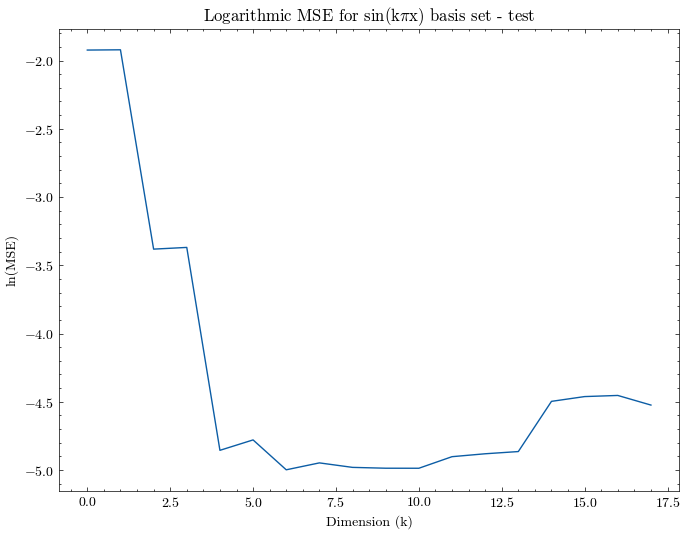

In [272]:
# plot the log average mse for test against dimension of sine basis function used
plt.figure(figsize=(8,6))
plt.title("Logarithmic MSE for sin(k"r"$\pi$""x) basis set - test")
plt.xlabel("Dimension (k)")
plt.ylabel("ln(MSE)")
plt.plot(orders18, logsin_mse_test)
plt.savefig("q3_sin-lnmse-test.png")
plt.show()

In [273]:
# initliase matrices to store mse results for 18 basis functions over 100 runs 
sin_mse_sample_all = np.zeros([100,18])
sin_mse_test_all = np.zeros([100,18])

# repeat linear regression process for randomly sampled train/test data over 100 runs
runs = 100
for r in tqdm(range(runs)):
    
    # generate new train/test splits each run
    X_train, y_train = generate_sin_data(sigma, 30)
    X_test, y_test = generate_sin_data(sigma, 1000)
    
    for k in range(0,18): 
        
        # build feature space of dimensions {len(X_sample), k+1} and find weights array {k+1, 1}
        phi, w = linear_regression(X_sample, y_sample, k+1, sin_feature_space)
        
        # make predictions and record mse
        pred_sample = eval_sin(w, X_sample)
        sin_mse_sample_all[r,k] = np.average((y_sample-pred_sample)**2)

        pred_test = eval_sin(w, X_test)
        sin_mse_test_all[r,k] = np.average((y_test-pred_test)**2)

  0%|          | 0/100 [00:00<?, ?it/s]

In [274]:
# calculate the log of the 100 run average mse for each basis  
logavgsin_mse_sample = np.log(np.average(sin_mse_sample_all, axis=0))
logavgsin_mse_test = np.log(np.average(sin_mse_test_all, axis=0))

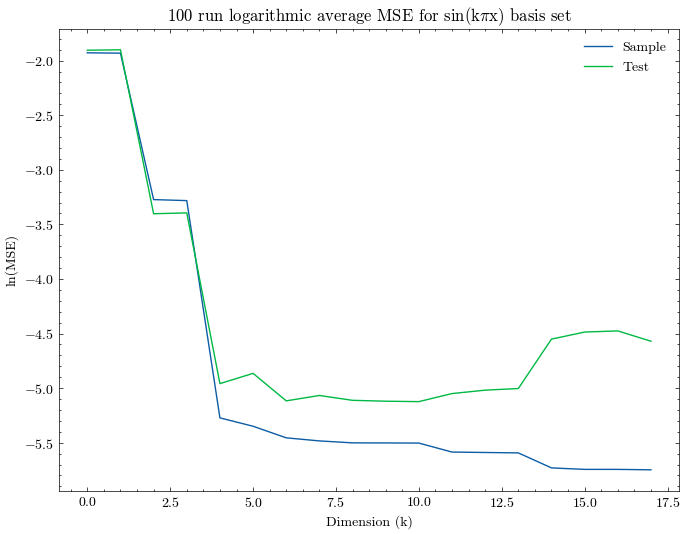

In [275]:
# plot the log average mse for train and test against dimension of sine basis function used
plt.figure(figsize=(8,6))
plt.title("100 run logarithmic average MSE for sin(k"r"$\pi$""x) basis set")
plt.xlabel("Dimension (k)")
plt.ylabel("ln(MSE)")
plt.plot(np.arange(0,18), logavgsin_mse_sample, label='Sample') 
plt.plot(np.arange(0,18), logavgsin_mse_test, label='Test') 
plt.legend()
plt.savefig("q3_sin-lnmse-100.png")
plt.show()

## 1.2 Filtered Boston Housing and Kernels

### 4a.

In [328]:
# import module to perform train/test splits
from sklearn.model_selection import train_test_split

In [329]:
# read in data and split input/output data
data = pd.read_csv("boston_housing.csv")
X = data.drop(columns='MEDV').to_numpy()
y = data['MEDV'].to_numpy()
y = y.reshape([len(y),1])

In [330]:
# initialise empty dictionary to store average mse (and standard deviation) for train and test
results_dict = {}

In [331]:
# initialise empty lists to store mse results
mse_total_train_const = []
mse_total_test_const = []

# perform 20 runs of naive regression utilising an array of ones for the input data
for i in tqdm(range(20)):
 
    # different random split of train/test data for each run
    X_train_const, X_test_const, y_train_const, y_test_const =  train_test_split(X, y, test_size=1/3) 
    
    # produce array of ones matching the length of the train/test splits
    ones_train = np.ones([len(X_train_const), 1])
    ones_test = np.ones([len(X_test_const), 1])
    
    # find optimal weights for regression using the vector of ones as the feature space
    w = optimal_weights(ones_train, y_train_const)
    
    # evaluate regression using (w^T@X)^T=X^T@w to avoid reshaping results array in mse calculation
    pred_train_const = ones_train@w
    pred_test_const = ones_test@w
    
    # calculate mse for train and test data and append to lists
    mse_total_train_const.append(np.average((y_train_const-pred_train_const)**2))
    mse_total_test_const.append(np.average((y_test_const-pred_test_const)**2))

  0%|          | 0/20 [00:00<?, ?it/s]

In [332]:
# calculate average mse and std    
mse_train_const_avg = np.average(mse_total_train_const).round(2)
mse_train_const_sd = np.std(mse_total_train_const).round(2)
mse_test_const_avg = np.average(mse_total_test_const).round(2)
mse_test_const_sd = np.std(mse_total_test_const).round(2)

In [333]:
# store results of naive regression in the results dictionary
results_dict["Naive Regression"] = {'Train': str(mse_train_const_avg)+"+/-"+str(mse_train_const_sd),
                                    'Test': str(mse_test_const_avg)+"+/-"+str(mse_test_const_sd)} 

### 4b.

The constant function derived in naive regression represents the arithmetic mean of the y-values employed during the regression analysis. This outcome is readily evident through the matrix computation which computes a left pseudo-inverse followed by the scalar product between the result and y values. 

The inner product enclosed within the inversion operation transpires between a $n\times 1$ column vector composed of ones and an $1\times n$ row vector also composed of ones, culminating in a $n\times n$ matrix occupied by ones. This value is subsequently subjected to a pseudo-inversion and the scalar product between a row vector of ones and the result of the inversion computed, yielding a row vector of length $n$, with each element equivalent to $\frac{1}{n}$. 

The dot product involving this row vector and the column vector of y-values results in the summation $\sum^n_{i=1}{\frac{1}{n}y_i}=\frac{1}{n}\sum^n_{i=1}{y_i}$, signifying the mean of the y-values.

### 4c.

In [336]:
# add constant bias term to X data using array of ones
ones_X = np.ones([len(X), 1])
X_bias = np.append(ones_X, X, axis=1)

# repeat linear regression isolating each attribute (plus the bias term)   
for col in tqdm(range(1,13)):
    
    # initialise empty lists to store results of mse from 20 repeats
    mse_total_train_col = []
    mse_total_test_col = []
    
    # repeat linear regression for 20 runs for each attribute (plus bias term)
    for i in range(20):
        
        # use a different random split each run
        X_col_train, X_col_test, y_train_col, y_test_col = train_test_split(X_bias[:,[0,col]], y, test_size=1/3) 
        
        # calculate optimal weights 
        w = optimal_weights(X_col_train, y_train_col)
        
        # evaluate regression using (w^T@X)^T=X^T@w to avoid reshaping results array in mse calculation
        pred_train_col = X_col_train@w
        pred_test_col = X_col_test@w
         
        # calculate mse for train and test data and append to lists
        mse_total_train_col.append(np.average((y_train_col-pred_train_col)**2))
        mse_total_test_col.append(np.average((y_test_col-pred_test_col)**2))
    
    # calculate average mse and std across the 20 runs       
    mse_train_col_avg = np.average(mse_total_train_col).round(2)
    mse_train_col_sd = np.std(mse_total_train_col).round(2)
    mse_test_col_avg = np.average(mse_total_test_col).round(2)
    mse_test_col_sd = np.std(mse_total_test_col).round(2)

    # store results for each attribute in the results dictionary
    results_dict[f"Linear Regression (Attribute {col})"] = {'Train': str(mse_train_col_avg)+"+/-"
                                                            +str(mse_train_col_sd), 
                                                            'Test': str(mse_test_col_avg)+"+/-"
                                                            +str(mse_test_col_sd)}

  0%|          | 0/12 [00:00<?, ?it/s]

### 4d.

In [337]:
# initialise empty lists to store mse results for regression on all attributes
mse_total_train = []
mse_total_test = []

# perform linear regression using all features plus a bias term for 20 repeats
for i in tqdm(range(20)):
 
    # randomly split the data for each run and adding the bias term to the train and test input data
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=1/3) 
    ones_train = np.ones([len(X_train), 1])
    X_train = np.append(ones_train, X_train, axis=1)
    ones_test = np.ones([len(X_test), 1])
    X_test = np.append(ones_test, X_test, axis=1)
    
    # calculate optimal weights 
    w = optimal_weights(X_train, y_train)
    
    # evaluate regression using (w^T@X)^T=X^T@w to avoid reshaping results array in mse calculation    
    pred_train = X_train@w
    pred_test = X_test@w
    
    # calculate mse for train and test data and append to lists
    mse_total_train.append(np.average((y_train-pred_train)**2))
    mse_total_test.append(np.average((y_test-pred_test)**2))

  0%|          | 0/20 [00:00<?, ?it/s]

In [338]:
# calculate average mse and standard deviation for the 20 repeats   
mse_train_avg = np.average(mse_total_train).round(2)
mse_train_sd = np.std(mse_total_train).round(2)
mse_test_avg = np.average(mse_total_test).round(2)
mse_test_sd = np.std(mse_total_test).round(2) 

In [339]:
# store results of linear regression using all attrubutes in the results dictionary
results_dict["Linear Regression (All Attributes)"] = {'Train': str(mse_train_avg)+"+/-"+str(mse_train_sd),
                                    'Test': str(mse_test_avg)+"+/-"+str(mse_test_sd)}

In [340]:
lr_results_df = pd.DataFrame.from_dict(results_dict).T
lr_results_df

,Train,Test
Naive Regression,99.43+/-20.33,93.27+/-20.55
Linear Regression (Attribute 1),71.4+/-5.33,75.46+/-11.22
Linear Regression (Attribute 2),86.56+/-17.21,92.56+/-22.45
Linear Regression (Attribute 3),71.63+/-12.29,68.01+/-11.58
Linear Regression (Attribute 4),98.82+/-25.6,98.27+/-29.02
Linear Regression (Attribute 5),72.07+/-6.3,73.2+/-9.23
Linear Regression (Attribute 6),44.58+/-3.66,43.34+/-7.33
Linear Regression (Attribute 7),71.1+/-5.49,77.34+/-12.16
Linear Regression (Attribute 8),79.72+/-5.53,80.17+/-10.75
Linear Regression (Attribute 9),82.34+/-17.35,83.54+/-19.77


## 1.3 Kernelised Ridge Regression

In [341]:
import seaborn as sns

In [405]:
def calculate_alpha(K, y, gamma):
    """
    Function to calculate the optimal alpha vector for kernel ridge regression using the dual representation

    Parameters
    ----------
    K : ndarray
        kernel matrix
    y : ndarray
        output data
    gamma : float
        regularisation parameter

    Returns
    -------
    Alpha array with length matching the number of observations: ndarray

    """
    l = len(K)
    # use numpys built-in identity function to generate an identity matrix of dimensions {l, l}
    I = np.identity(l)
    # utilise numpys built-in inverse function to complete matrix calculation
    return np.linalg.inv(K+(gamma*l*I))@y

In [406]:
def gaussian_kernel(i, j, sigma):
    """
    Function to generate individual values of a Gaussian kernel with spread parameterised by sigma 

    Parameters
    ----------
    i : float
        ith value of X data
    j : float
        jth value of X data
    sigma : float
        parameter chracterising the spread of the Gaussian used to calculate te kernel

    Returns
    -------
    Kernel value representing the similairity between points i and j: float

    """
    # calculate the distance between input data using numpys built-in function for the euclidian norm
    norm = np.linalg.norm(i-j)
    # using the norm above to return values for the gaussian kernel
    return np.exp(-(norm**2)/(2*sigma**2))

In [457]:
def gaussian_kernel_matrix(X1, X2, sigma):
    """
    Function to generate the gaussian kernel with bandwidth sigma.
    
    Parameters
    ----------
    X1 : float
        dataset 1
    X2 : float
        dataset 2
    sigma : float
        parameter chracterising the spread of the Gaussian used to calculate te kernel

    Returns
    -------
    Populated Gaussian kenrel matrix: ndarray
    """
    # calculate the distance between the input datasets using numpys built-in function for the euclidian norm
    # broadcast X1 to shape (n, 1, dim) and X2 to (1, m, dim) and calculate the norm along the final axis
    dist = np.linalg.norm(np.expand_dims(X1, 1) - np.expand_dims(X2, 0), ord=2, axis=-1)
    # using the norm above to return values for the gaussian kernel
    return np.exp(-(dist**2)/(2*sigma**2))

In [445]:
def pred_y(alpha, X, t, kernel_function, sigma):
    """
    Function producing a single y prediction corresponding to test point t.

    Parameters
    ----------
    alpha : ndarray
        array of alpha values
    X : ndarray
        train dataset
    t : ndarray
        test dataset to make predictions from
    kernel_function: Callable
        function to build the kernel matrix between two sets of data
    sigma : float
        parameter of gaussian kernel

    Returns
    -------
    Predicition corresponding to test point t: float 

    """
    # generate a kernel using the two sets of data, X and t
    K_test = kernel_function(X, t, sigma)
    # make use of vectorisation in numpy to compute predicitons; compute as below so result has dimensions {m, 1}
    pred = K_test.T@alpha
    return pred

### 5a.

In [446]:
# produce initial train/test splits using data from question 4
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=1/3) 

In [447]:
# create gamma/sigma parameter lists as described in the question
gamma_power = np.arange(-40, -25)
gamma_list = [2**int(i) for i in gamma_power]
sigma_power = np.arange(7, 13.5, 0.5)
sigma_list = [2**i for i in sigma_power]

In [448]:
# determine fold size for 5 fold cross validation
l = len(X_train)
k = 5
fold_size = l//k

In [449]:
%%time
# initliase best gamma/sigma and minimum error trackers
best_gamma = 0
best_sigma = 0
min_error = np.infty

# initliase empty mse matrix with rows representing gamma values and columns sigma values
mse_matrix = np.zeros([len(gamma_list), len(sigma_list)])

# loop through all values of gamma and sigma and fit kernel ridge regression
# use the same train and test samples for each combination of parameters
for g in range(len(gamma_list)):
    for s in range(len(sigma_list)):
        
        mse_cv = []
        
        # perform 5 fold cross validation to fit kernel ridge regresison
        for fold in range(k):

            start = fold*fold_size
            end = (fold+1)*fold_size
            
            # generate splits for cross validation
            X_train_cv = np.concatenate((X_train[:start], X_train[end:]), axis=0)
            y_train_cv = np.concatenate((y_train[:start], y_train[end:]), axis=0)
            X_test_cv = X_train[start:end]
            y_test_cv = y_train[start:end]
            
            # generate kernel matrix using X train cv split and current sigma
            # kernel_cv = kernel_matrix(X_train_cv, X_train_cv, sigma_list[s])
            kernel_cv = gaussian_kernel_matrix(X_train_cv, X_train_cv, sigma_list[s])

            
            # calculate alpha vector using generated kernel, y train cv split, and current gamma                       
            alpha_cv = calculate_alpha(kernel_cv, y_train_cv, gamma_list[g])
            
            # fit test cv data using alpha vector
            pred_cv = pred_y(alpha_cv, X_train_cv, X_test_cv, gaussian_kernel_matrix, sigma_list[s])
            
            # convert predictions to column vector and calculate mse
            mse_cv.append(np.average((y_test_cv-pred_cv)**2))
        
        # average mse calculation over 5 folds and assign to mse matrix
        mean_mse_cv = np.average(mse_cv)
        mse_matrix[g,s] = mean_mse_cv
        
        # if mse is lower than current lowest error, update sigma, gamma and minimum error
        if mean_mse_cv < min_error:
            best_gamma = gamma_list[g]
            best_sigma = sigma_list[s]
            min_error = mean_mse_cv

CPU times: user 1min 43s, sys: 4.95 s, total: 1min 48s
Wall time: 16.7 s


### 5b.

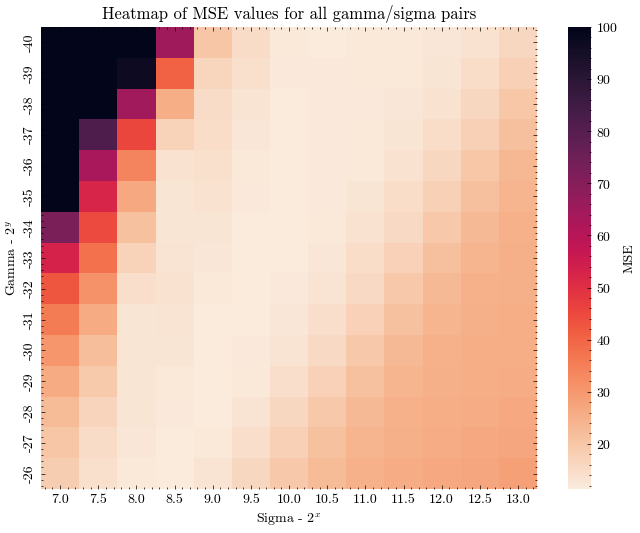

In [464]:
# plot mse vs sigma and gamma as a heatmap   
plt.figure(figsize=(8,6))
fig = sns.heatmap(mse_matrix, xticklabels=sigma_power, yticklabels=gamma_power, vmax=100,
                  cmap=sns.cm.rocket_r, cbar_kws={'label': 'MSE'})
plt.title("Heatmap of MSE values for all gamma/sigma pairs")
plt.xlabel("Sigma - "r"$2^x$")
plt.ylabel("Gamma - "r"$2^y$")
plt.savefig("q5b_mse_heatmap.png")
plt.show(fig)

### 5c.

In [451]:
# build optimal kernel using train data and best sigma
best_kernel = kernel_matrix(X_train, X_train, best_sigma)

In [452]:
# create optimal alpha vector using above optimal kernel and best gamma                     
best_alpha = calculate_alpha(best_kernel, y_train, best_gamma)

In [453]:
# calculate predictions and mse of the train data using created alpha vector
train_pred = fit_y(best_alpha, X_train, X_train, kernel_matrix, best_sigma) 
mse_train = np.average((y_train-train_pred)**2)
print(mse_train)

6.92992057757075


In [454]:
# repeat above for test data
test_pred = fit_y(best_alpha, X_train, X_test, kernel_matrix, best_sigma)  
mse_test = np.average((y_test-test_pred)**2) 
print(mse_test)

12.746802668070469


### 5d.

In [456]:
%%time
# initliase empty mse lists to store results of 20 repeats
mse_train_20 = []
mse_test_20 = []

# iniitialise empty lists to store best gamma/sigma pair for each run of 20
best_simga_list = []
best_gamma_list =[]

# repeat process in b for 20 iterations
for i in tqdm(range(20)):
    
    # different random split of data each run
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=1/3) 
    
    best_gamma = 0
    best_sigma = 0

    min_error = np.infty
    
    # loop through all values of gamma and sigma and fit kernel ridge regression
    # use the same train and test samples for each combination of parameters
    for g in range(len(gamma_list)):
        for s in range(len(sigma_list)):

            mse_cv = []

            # perform 5 fold cross validation to fit kernel ridge regresison
            for fold in range(k):

                start = fold*fold_size
                end = (fold+1)*fold_size

                # generate splits for cross validation
                X_train_cv = np.concatenate((X_train[:start], X_train[end:]), axis=0)
                y_train_cv = np.concatenate((y_train[:start], y_train[end:]), axis=0)
                X_test_cv = X_train[start:end]
                y_test_cv = y_train[start:end]

                # generate kernel matrix using X train cv split and current sigma
                kernel_cv = gaussian_kernel_matrix(X_train_cv, X_train_cv, sigma_list[s])

                # calculate alpha vector using generated kernel, y train cv split, and current gamma                       
                alpha_cv = calculate_alpha(kernel_cv, y_train_cv, gamma_list[g])

                # fit test cv data using alpha vector
                y_pred_cv = pred_y(alpha_cv, X_train_cv, X_test_cv, gaussian_kernel_matrix, sigma_list[s])

                # convert predictions to column vector and calculate mse
                mse_cv.append(np.average((y_test_cv-y_pred_cv)**2))

            # average mse calculation over 5 folds and assign to mse matrix
            mean_mse_cv = np.average(mse_cv)

            # if mse is lower than current lowest error, update sigma, gamma and minimum error
            if mean_mse_cv < min_error:
                best_gamma = gamma_list[g]
                best_sigma = sigma_list[s]
                min_error = mean_mse_cv
    
    # append best gamma/sigma of run to lists
    best_simga_list.append(best_sigma)
    best_gamma_list.append(best_gamma)            
    
    # generate best kernel and alpha vector of run
    run_best_kernel = gaussian_kernel_matrix(X_train, X_train, best_sigma)
    run_best_alpha = calculate_alpha(run_best_kernel, y_train, best_gamma)

    # caluclate predictions using optimal alpha found in the run and calculate mse
    train_pred = fit_y(run_best_alpha, X_train, X_train, gaussian_kernel_matrix, best_sigma) 
    mse_train_20.append(np.average((y_train-train_pred)**2))

    # repeat above for test data
    test_pred = fit_y(run_best_alpha, X_train, X_test, gaussian_kernel_matrix, best_sigma)  
    mse_test_20.append(np.average((y_test-test_pred)**2))

  0%|          | 0/20 [00:00<?, ?it/s]

CPU times: user 21min 13s, sys: 1min 28s, total: 22min 42s
Wall time: 3min 10s


In [458]:
# calculate the average mse and corresponding standard deviation               
mse_train_avg = np.average(mse_train_20).round(2)
mse_train_sd = np.std(mse_train_20).round(2)
mse_test_avg = np.average(mse_test_20).round(2)
mse_test_sd = np.std(mse_test_20).round(2)

In [459]:
# add results of kernel ridge regression to results dict  
results_dict["Kernel Ridge Regression"] = {'Train': str(mse_train_avg)+"+/-"+str(mse_train_sd),
                                    'Test': str(mse_test_avg)+"+/-"+str(mse_test_sd)} 

In [460]:
results_df = pd.DataFrame.from_dict(results_dict).T

In [461]:
results_df

,Train,Test
Naive Regression,99.43+/-20.33,93.27+/-20.55
Linear Regression (Attribute 1),71.4+/-5.33,75.46+/-11.22
Linear Regression (Attribute 2),86.56+/-17.21,92.56+/-22.45
Linear Regression (Attribute 3),71.63+/-12.29,68.01+/-11.58
Linear Regression (Attribute 4),98.82+/-25.6,98.27+/-29.02
Linear Regression (Attribute 5),72.07+/-6.3,73.2+/-9.23
Linear Regression (Attribute 6),44.58+/-3.66,43.34+/-7.33
Linear Regression (Attribute 7),71.1+/-5.49,77.34+/-12.16
Linear Regression (Attribute 8),79.72+/-5.53,80.17+/-10.75
Linear Regression (Attribute 9),82.34+/-17.35,83.54+/-19.77
